In [9]:
import numpy as np
import time, os, sys
import mxnet as mx
import matplotlib.pyplot as plt
import glob
import sys
#sys.path.insert(0,'/github/cellpose/')
from cellpose import models, utils

# check if GPU working, and if so use it
use_gpu = utils.use_gpu()
if use_gpu:
    device = mx.gpu()
else:
    device = mx.cpu()

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(device, model_type='cyto')

# list of files
# PUT PATH TO YOUR FILES HERE!
files = ['data/raw/RAW_TIFF/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_26_ch_4.tif']

imgs = [plt.imread(f) for f in files]
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[2,3]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if rescale is set to None, the size of the cells is estimated on a per image basis
# if you want to set the size yourself, set it to 30. / average_cell_diameter
masks, flows, styles, diams = model.eval(imgs, rescale=None, channels=channels)

100%|██████████| 1/1 [00:47<00:00, 47.16s/it]


estimated cell diameters for all images


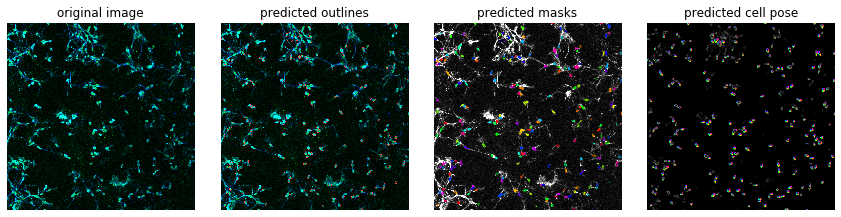

In [10]:

from cellpose import plot, transforms
for idx in range(nimg):
    img = transforms.reshape(imgs[idx], channels[idx])
    img = plot.rgb_image(img)
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,3))
    # can save images (set save_dir=None if not)
    plot.show_segmentation(fig, img, maski, flowi)
    plt.tight_layout()
    plt.show()

In [11]:
def show(img,title):
    fig2 = plt.figure(figsize = (15,15))
    ax3 = fig2.add_subplot(111)
    ax3.imshow(img, interpolation='none')
    ax3.set_title(title)

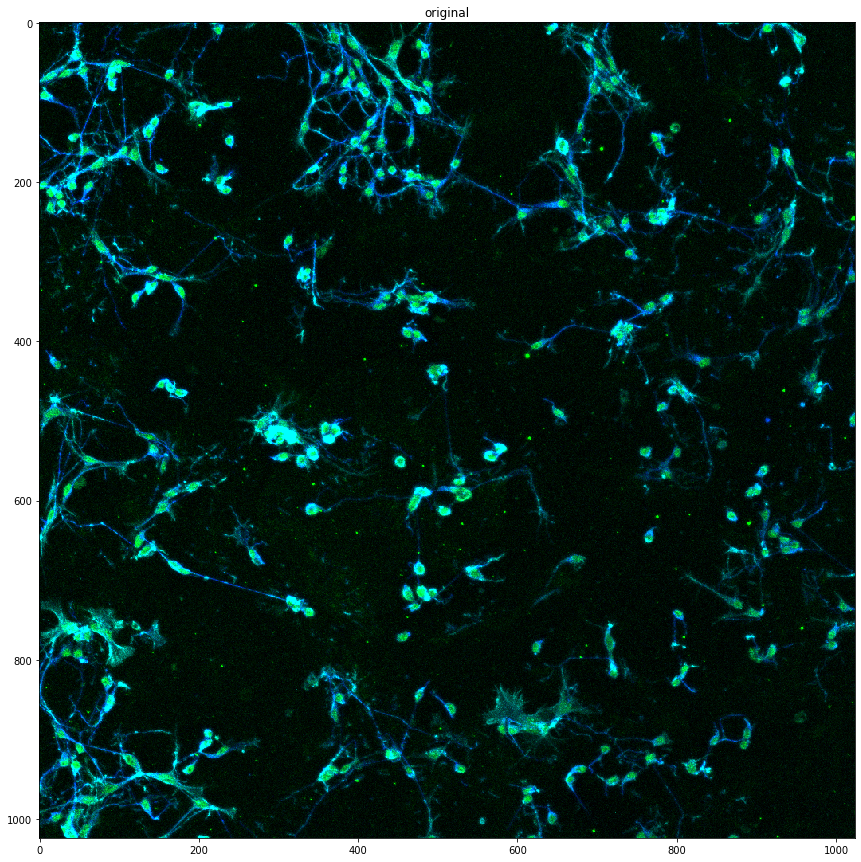

In [12]:
show(img,'original')

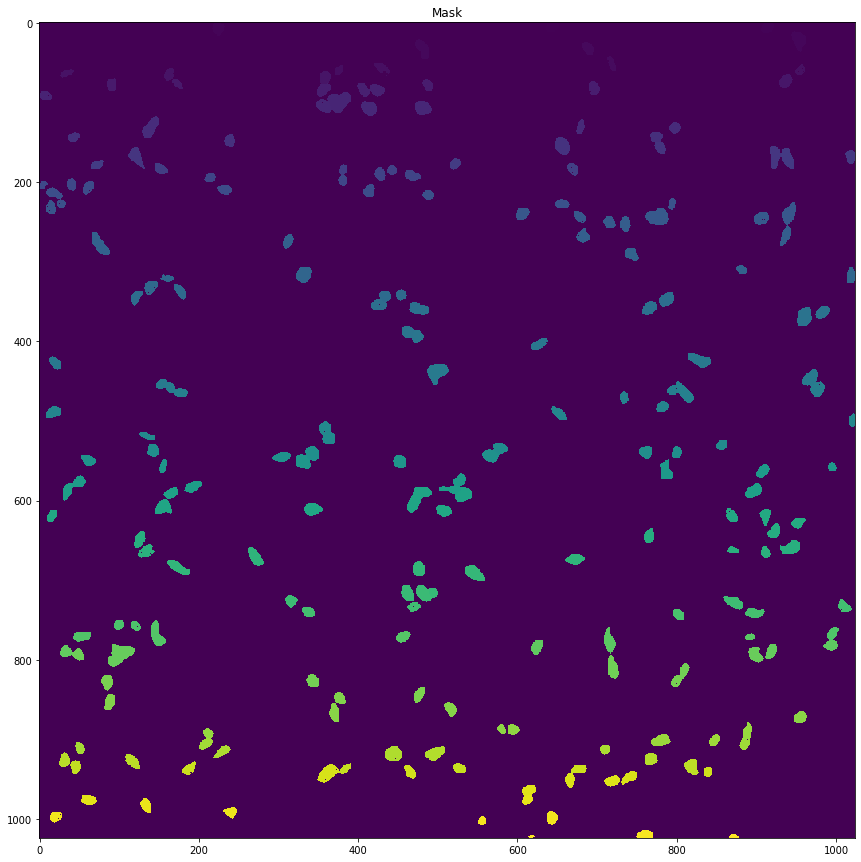

In [13]:
show(masks[0],'Mask')

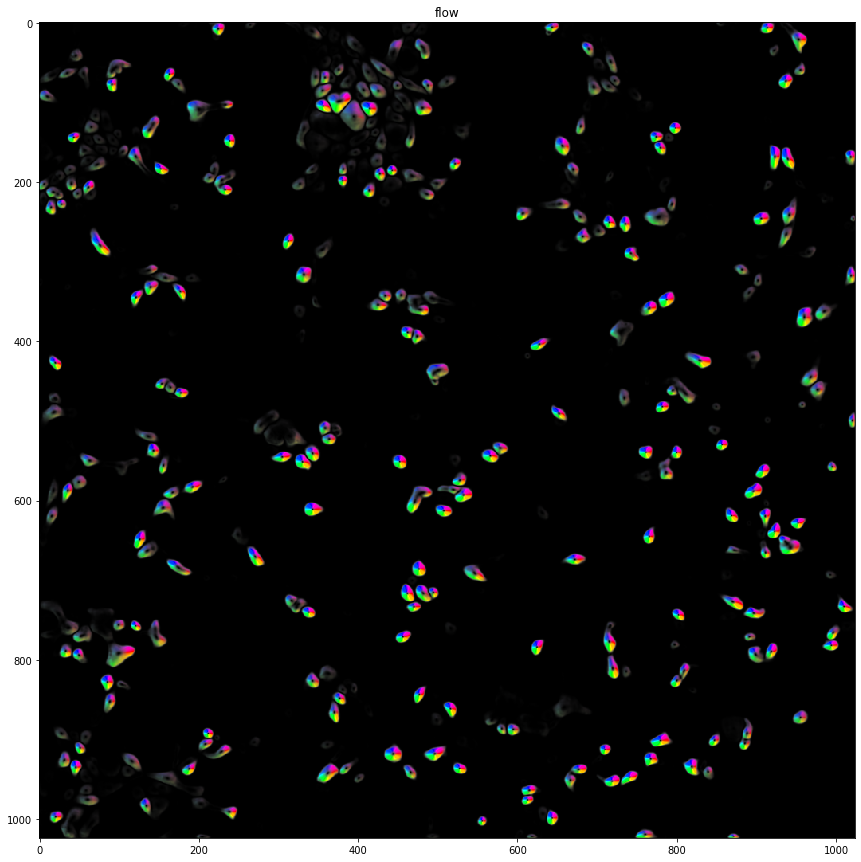

In [14]:
show(flows[0][0],'flow')